In [152]:
import networkx as nx
import scipy.stats as stat
import statistics
import copy
import random
import matplotlib.pyplot as plt

In [133]:
population = 25
households = 8
mean_size = population/households
household_array = []

while sum(household_array) < population:
    v = stat.poisson.rvs(mean_size)
    if v>0:
        household_array.append(v)
    
print(household_array)
print(statistics.mean(household_array))
print(sum(household_array))

[2, 3, 4, 3, 4, 4, 4, 5]
3.625
29


In [134]:
node = 0
G = nx.Graph()
household_links = []
for h in household_array:
    for i in range(h):
        for j in range(h):
            if i<j:
                G.add_edge(i+node,j+node)
                household_links.append([i+node,j+node])
    node+=h

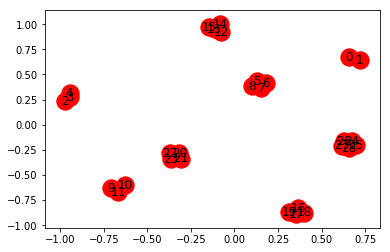

In [135]:
nx.draw_networkx(G)
#nx.average_neighbor_degree(G)

In [136]:
def ave_deg(G):
    return(len(G.edges())/len(G.nodes()))

In [137]:
G_edges = list(G.edges())

average_degree(G)

1.4137931034482758

In [143]:
def create_hh_graph(pop,hh):
    mean_size = pop/hh
    hh_array = []
    node =0
    G = nx.Graph()
    hh_links = []

    while sum(hh_array) < pop:
        v = stat.poisson.rvs(mean_size)
        if v>0:
            hh_array.append(v)
    node = 0
    G = nx.Graph()
    hh_links = []
    for h in hh_array:
        for i in range(h):
            for j in range(h):
                if i<j:
                    G.add_edge(i+node,j+node)
                    hh_links.append([i+node,j+node])
        node+=h
    return(G,hh_array)

In [333]:
G,hh_array = create_hh_graph(30,10)
average_degree(G)
print(len(list(G.nodes())))

31


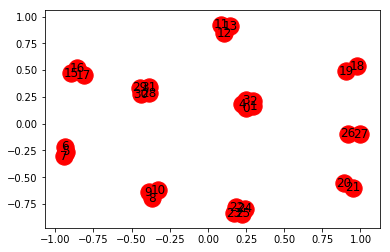

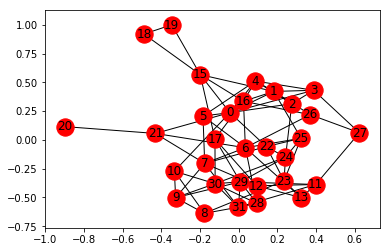

In [383]:
def add_edges(Graph,p):
    G2 = copy.deepcopy(Graph)
    G2_nodes = list(G2.nodes())
    added_edges = []
    while average_degree(G2)<p:
        i = random.choice(G2_nodes)
        j = random.choice(G2_nodes)
        if i!=j and G.has_edge(min(i,j),max(i,j)) == 0:
            G2.add_edge(i,j)
            added_edges.append([i,j])
    return(G2,added_edges)

G2,added_edges = add_edges(G,2.5)
nx.draw_networkx(G)
plt.show()
nx.draw_networkx(G2)
plt.show()

Could not locate edge 6 26
Could not locate edge 0 22
1.1935483870967742


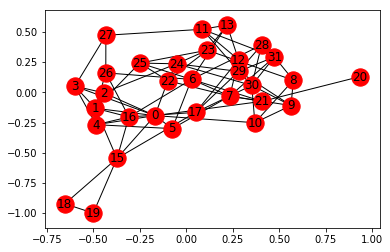

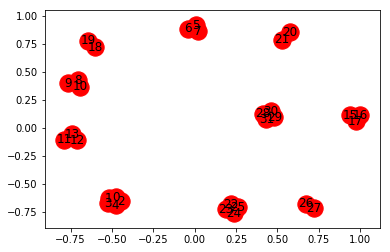

In [384]:
def remove_edges(Graph,added_edges,p):
    G3 = copy.deepcopy(Graph)
    while average_degree(G3)>p and len(added_edges)>0:
        a_ij = random.choice(added_edges)
        del added_edges[added_edges.index(a_ij)]
        i = min(a_ij)
        j = max(a_ij)
        if G3.has_edge(i,j):
            G3.remove_edge(i,j)
        else:
            print("Could not locate edge",i,j)
    return(G3,added_edges)

        
G3,added_edges = remove_edges(G2,added_edges,0)
print(ave_deg(G3))
nx.draw_networkx(G2)
plt.show()
nx.draw_networkx(G3)
plt.show()

In [482]:
G,hh_array = create_hh_graph(1000,300)
average_degree(G)

1.8662486938349008

In [486]:
G2,added_edges = add_edges(G,5)
average_degree(G2)

5.0

In [291]:
G3,added_edges3 = remove_edges(G2,added_edges,1)
average_degree(G3)

1.2222222222222223

In [385]:
maxk = max([y for x,y in list(G.degree())])
mink = min([y for x,y in list(G.degree())])
print(maxk,mink)

maxk = max([y for x,y in list(G2.degree())])
mink = min([y for x,y in list(G2.degree())])
print(maxk,mink)

maxk = max([y for x,y in list(G3.degree())])
mink = min([y for x,y in list(G3.degree())])
print(maxk,mink)

4 1
9 1
4 1


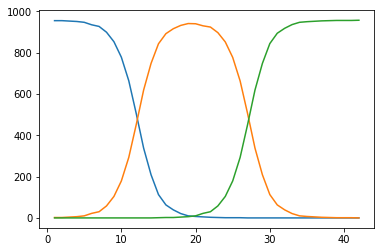

In [489]:
def percolate(Graph,tau,trans):
    s,i,r=list(Graph.nodes()),{},[]
    s_hist,i_hist,r_hist,days = [],[],[],[]
    patient_0 = random.choice(s)
    del s[s.index(patient_0)]
    i[patient_0] = [tau,list(Graph.neighbors(patient_0))]
    #print(len(s),'\n',i,'\n',r)
    while len(i) > 0:
        days.append(len(days)+1)
        #print(i)
        recoveries = []
        infections = []
        for  k,v in i.items():
            #print(k,v)
            if v[0] == 0:
                recoveries.append(k)
            else:
                i[k][0] -=1
                for n in v[1]:
                    if random.random()<trans and n in s \
                            and n not in infections:
                        infections.append(n)
        #print(recoveries,infections)
        for n in recoveries:
            del i[n]
            r.append(n)
        for n in infections:
            i[n] = [tau,list(Graph.neighbors(n))]
            #print(s)
            del s[s.index(n)]
        s_hist.append(len(s))
        i_hist.append(len(i))
        r_hist.append(len(r))
    #print(s_hist)
    #print(i_hist)
    #print(r_hist)
    #print(len(s_hist),len(i_hist),len(r_hist))
    #print(days)
    plt.plot(days,s_hist)
    plt.plot(days,i_hist)
    plt.plot(days,r_hist)
percolate(G2,14,.1)

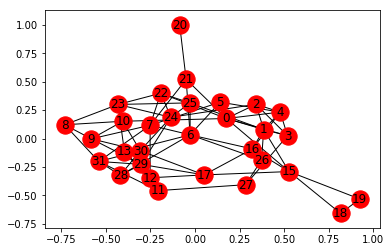

In [434]:
nx.draw_networkx(G2)